In [63]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [64]:
threshold = 0.5

In [65]:
corr_closing_df = pd.read_csv('correlation_log_diff_ch_closing_price.csv')

In [66]:
corr_closing_df.columns

Index(['FILENAME1', 'FILENAME2', 'CORRELATION'], dtype='object')

In [67]:
corr_closing_df.describe()

,CORRELATION
count,40000.000000
mean,0.197593
std,0.152392
min,-0.357092
25%,0.083244
50%,0.199887
75%,0.294395
max,1.000000


In [68]:
G = nx.Graph()

In [70]:
nodes = set(corr_closing_df['FILENAME1'].unique()) | set(corr_closing_df['FILENAME2'].unique())
G.add_nodes_from(nodes)

In [71]:
for _, row in corr_closing_df.iterrows():
    weight=row['CORRELATION']
    if weight > threshold and row['FILENAME1'] != row['FILENAME2']:
        G.add_edge(row['FILENAME1'], row['FILENAME2'], weight=weight)


In [72]:
G.number_of_edges()

291

{('NMDC', 'SAIL'): Text(-0.1492295146714571, 0.03567109662831821, '0.60'),
 ('NMDC', 'HINDALCO'): Text(-0.14423305048023233, 0.04204434333661533, '0.55'),
 ('NMDC',
  'JINDALSTEL'): Text(-0.15962632096762214, 0.04814529768724061, '0.54'),
 ('NMDC',
  'JSWSTEEL'): Text(-0.14323246624244657, 0.032916464367775886, '0.52'),
 ('NMDC',
  'COALINDIA'): Text(-0.23639553481680656, 0.08991382645984235, '0.54'),
 ('AXISBANK', 'LT'): Text(-0.04524257578658902, -0.033663974092544964, '0.54'),
 ('AXISBANK',
  'HDFCBANK'): Text(-0.025493759779048587, -0.030048402120163856, '0.55'),
 ('AXISBANK',
  'FEDERALBNK'): Text(-0.03575902651242424, -0.049117192712904045, '0.67'),
 ('AXISBANK',
  'GRASIM'): Text(-0.06798187709168504, -0.03754638279014971, '0.55'),
 ('AXISBANK',
  'SHRIRAMFIN'): Text(-0.012607881327706554, -0.05004613858475816, '0.53'),
 ('AXISBANK',
  'INDUSINDBK'): Text(-0.020529343768739806, -0.04164322705863291, '0.60'),
 ('AXISBANK',
  'BAJFINANCE'): Text(-0.026733746217139573, -0.039159488

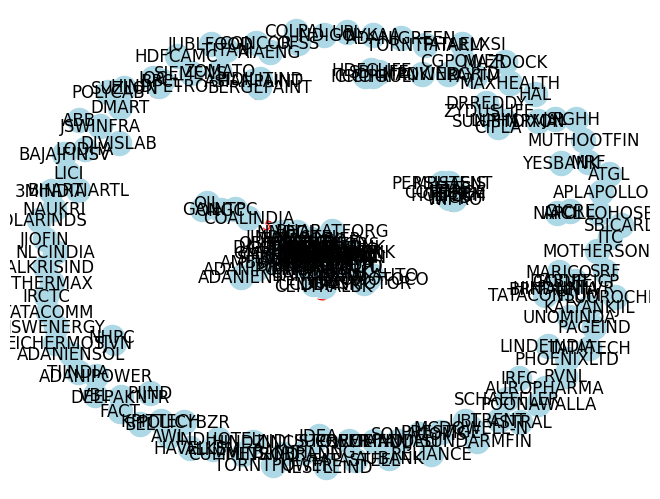

In [73]:
plt.figure()  # Adjust the width and height as needed

pos = nx.spring_layout(G)  # Positioning the nodes using a spring layout
nx.draw(G, pos, with_labels=True, node_color='lightblue')
edge_labels = {(u, v): f"{w:.2f}" for (u, v, w) in G.edges(data='weight')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

In [74]:

# Calculate the degree centrality
degree_centrality = nx.degree_centrality(G)
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the betweenness centrality in descending order
for node, centrality in sorted_degree_centrality:
    print(f"Node {node}: Degree Centrality = {centrality:.4f}")

Node L%26TFH: Degree Centrality = 0.1307
Node FEDERALBNK: Degree Centrality = 0.1256
Node SBIN: Degree Centrality = 0.1206
Node ICICIBANK: Degree Centrality = 0.1005
Node IDFCFIRSTB: Degree Centrality = 0.0905
Node DLF: Degree Centrality = 0.0905
Node AXISBANK: Degree Centrality = 0.0804
Node GRASIM: Degree Centrality = 0.0804
Node BAJFINANCE: Degree Centrality = 0.0754
Node CANBK: Degree Centrality = 0.0704
Node PNB: Degree Centrality = 0.0603
Node UNIONBANK: Degree Centrality = 0.0603
Node JSWSTEEL: Degree Centrality = 0.0553
Node BANKBARODA: Degree Centrality = 0.0553
Node LT: Degree Centrality = 0.0553
Node SAIL: Degree Centrality = 0.0503
Node TATAMOTORS: Degree Centrality = 0.0452
Node HINDALCO: Degree Centrality = 0.0452
Node BANKINDIA: Degree Centrality = 0.0452
Node LTIM: Degree Centrality = 0.0452
Node SHRIRAMFIN: Degree Centrality = 0.0452
Node ULTRACEMCO: Degree Centrality = 0.0452
Node COFORGE: Degree Centrality = 0.0452
Node INDUSINDBK: Degree Centrality = 0.0402
Node M%2

In [75]:
betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the betweenness centrality in descending order
for node, centrality in sorted_betweenness:
    print(f"Node {node}: Betweenness Centrality = {centrality:.4f}")

Node SBIN: Betweenness Centrality = 0.0149
Node NMDC: Betweenness Centrality = 0.0142
Node GRASIM: Betweenness Centrality = 0.0139
Node L%26TFH: Betweenness Centrality = 0.0133
Node COALINDIA: Betweenness Centrality = 0.0117
Node ICICIBANK: Betweenness Centrality = 0.0114
Node FEDERALBNK: Betweenness Centrality = 0.0096
Node JSWSTEEL: Betweenness Centrality = 0.0095
Node MARUTI: Betweenness Centrality = 0.0095
Node DLF: Betweenness Centrality = 0.0084
Node SAIL: Betweenness Centrality = 0.0061
Node ONGC: Betweenness Centrality = 0.0060
Node ULTRACEMCO: Betweenness Centrality = 0.0054
Node ACC: Betweenness Centrality = 0.0052
Node UNIONBANK: Betweenness Centrality = 0.0051
Node TATAMOTORS: Betweenness Centrality = 0.0050
Node HINDALCO: Betweenness Centrality = 0.0048
Node PNB: Betweenness Centrality = 0.0047
Node AXISBANK: Betweenness Centrality = 0.0044
Node BHEL: Betweenness Centrality = 0.0036
Node IDFCFIRSTB: Betweenness Centrality = 0.0034
Node ADANIPORTS: Betweenness Centrality = 

In [76]:
# Calculate the Page Rank
pagerank = nx.pagerank(G, max_iter=2000)

# Sort the Page Rank values in descending order
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Print the Page Rank in descending order
for node, centrality in sorted_pagerank:
    print(f"Node {node}: Pagerank = {centrality:.4f}")

Node L%26TFH: Pagerank = 0.0237
Node FEDERALBNK: Pagerank = 0.0224
Node SBIN: Pagerank = 0.0220
Node ICICIBANK: Pagerank = 0.0186
Node DLF: Pagerank = 0.0178
Node DABUR: Pagerank = 0.0166
Node GRASIM: Pagerank = 0.0162
Node IDFCFIRSTB: Pagerank = 0.0159
Node AXISBANK: Pagerank = 0.0149
Node CANBK: Pagerank = 0.0140
Node BAJFINANCE: Pagerank = 0.0132
Node BRITANNIA: Pagerank = 0.0123
Node LUPIN: Pagerank = 0.0123
Node PNB: Pagerank = 0.0122
Node UNIONBANK: Pagerank = 0.0122
Node JSWSTEEL: Pagerank = 0.0121
Node ONGC: Pagerank = 0.0119
Node COFORGE: Pagerank = 0.0118
Node LTIM: Pagerank = 0.0118
Node SAIL: Pagerank = 0.0116
Node BANKBARODA: Pagerank = 0.0112
Node ULTRACEMCO: Pagerank = 0.0110
Node MARUTI: Pagerank = 0.0108
Node HINDALCO: Pagerank = 0.0105
Node HDFCLIFE: Pagerank = 0.0105
Node ICICIPRULI: Pagerank = 0.0102
Node INFY: Pagerank = 0.0102
Node TATAMOTORS: Pagerank = 0.0101
Node HCLTECH: Pagerank = 0.0099
Node LT: Pagerank = 0.0099
Node BANKINDIA: Pagerank = 0.0096
Node ZYDUSL

In [77]:
# Calculate the eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Sort the eigenvector centrality values in descending order
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the eigenvector centrality in descending order
for node, centrality in sorted_eigenvector:
    print(f"Node {node}: Eigenvector Centrality = {centrality:.4f}")

Node FEDERALBNK: Eigenvector Centrality = 0.3197
Node L%26TFH: Eigenvector Centrality = 0.3144
Node SBIN: Eigenvector Centrality = 0.3018
Node ICICIBANK: Eigenvector Centrality = 0.2750
Node IDFCFIRSTB: Eigenvector Centrality = 0.2533
Node AXISBANK: Eigenvector Centrality = 0.2345
Node BAJFINANCE: Eigenvector Centrality = 0.2306
Node DLF: Eigenvector Centrality = 0.2215
Node CANBK: Eigenvector Centrality = 0.2038
Node GRASIM: Eigenvector Centrality = 0.1805
Node LT: Eigenvector Centrality = 0.1788
Node INDUSINDBK: Eigenvector Centrality = 0.1556
Node SHRIRAMFIN: Eigenvector Centrality = 0.1553
Node BANKBARODA: Eigenvector Centrality = 0.1524
Node M%26MFIN: Eigenvector Centrality = 0.1511
Node PNB: Eigenvector Centrality = 0.1467
Node CHOLAFIN: Eigenvector Centrality = 0.1463
Node BANDHANBNK: Eigenvector Centrality = 0.1275
Node UNIONBANK: Eigenvector Centrality = 0.1261
Node JSWSTEEL: Eigenvector Centrality = 0.1242
Node HDFCBANK: Eigenvector Centrality = 0.1233
Node TATAMOTORS: Eigenv

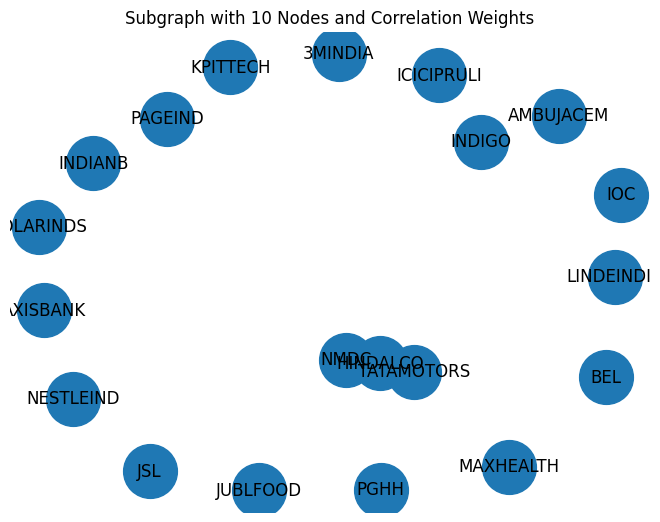

In [84]:
# Extract a subgraph with only 10 nodes
nodes_to_visualize = list(nodes)[:20]
subgraph = G.subgraph(nodes_to_visualize)

# Draw the subgraph
pos = nx.spring_layout(subgraph)  # Positioning the nodes using a spring layout
nx.draw(subgraph, pos, with_labels=True, node_size = 1500)
edge_labels = {(u, v): f"{w:.2f}" for (u, v, w) in subgraph.edges(data='weight')}
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels)

# Show the graph
plt.title('Subgraph with 10 Nodes and Correlation Weights')
plt.show()